In [12]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

## Linear Regression

We are trying to get a 3D model of the slope, intercept, and its likelihood in modeling the data provided. To do this approach we will use the following equation...

$$p(y|X, w) = \prod_{i=1}^n{\frac{1}{\sqrt{2\pi}\sigma_n}\exp\big[-\frac{(y_i-x_i^Tw)^2}{2\sigma_n^2}\big]}$$

This will give us the probability of how accurately one slope and one intercept will model the data. We can try multiple random weights to get a distribution.

Below we begin by manipulating the data and preparing it for modeling.

In [2]:
df = pd.read_csv('data/Advertising.csv').drop('Unnamed: 0', axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot: xlabel='TV', ylabel='Sales'>

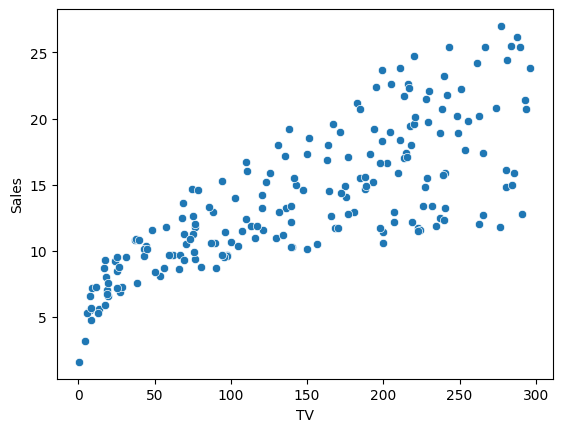

In [15]:
sns.scatterplot(x=df.TV, y=df.Sales)

In [3]:
# Obtains independent and dependent vectors
x = df.TV.to_numpy()
y = df.Sales.to_numpy()
x[0:5], y[0:5]

(array([230.1,  44.5,  17.2, 151.5, 180.8]),
 array([22.1, 10.4,  9.3, 18.5, 12.9]))

In [4]:
# Scales vectors
x = x / x.mean()
y = y / y.mean()
x[0:5], y[0:5]

(array([1.5648537 , 0.30263359, 0.11697298, 1.03031436, 1.22957648]),
 array([1.57603851, 0.74166518, 0.66321983, 1.31930825, 0.91995008]))

In [ ]:
sns.scatterplot(x=x, y=y)

### Helper Functions
These functions will help us calculate the likelihood of a random weight

In [5]:
# Likelihood of one point
def like_point(x_i, y_i, w0, w1, noise_std=1):
    scale = 1 / (math.sqrt(2 * math.pi) * noise_std)
    return scale * math.exp(-((y_i - np.matmul([1, x_i], [w0, w1])) ** 2) / (2 * noise_std ** 2))

In [6]:
# Product of all the points
def likelihood(x=x, y=y, w0=0, w1=0, noise_std=1):
    prob_points = np.vectorize(like_point)(x, y, w0, w1, noise_std=noise_std)
    return np.prod(prob_points)

In [7]:
# Random weights used and calculated with
w = np.random.normal(0, 1, size=(1000, 2))
likely = np.vectorize(likelihood)(w0=w[:,0], w1=w[:,1])
likely

array([0.00000000e+000, 1.81938245e-169, 0.00000000e+000, 6.93061232e-088,
       0.00000000e+000, 8.35065551e-119, 0.00000000e+000, 1.66290814e-186,
       4.13114010e-102, 1.00391954e-094, 1.81706304e-221, 4.68591980e-151,
       6.20205748e-104, 4.44166293e-169, 1.17465427e-156, 9.32698121e-116,
       5.38793248e-113, 5.57847868e-123, 4.21073490e-091, 0.00000000e+000,
       5.69376458e-136, 0.00000000e+000, 4.72733037e-129, 0.00000000e+000,
       3.77737677e-120, 1.52856936e-114, 1.53284906e-107, 1.11923364e-087,
       8.63452959e-111, 1.83434240e-089, 0.00000000e+000, 1.13946676e-110,
       2.57091565e-286, 1.89942222e-086, 2.99098469e-164, 2.22069951e-089,
       7.20178545e-120, 5.83312148e-225, 1.78093493e-183, 4.12458031e-179,
       8.19469686e-127, 3.79820236e-113, 3.55699824e-192, 1.09398505e-149,
       0.00000000e+000, 8.49088961e-236, 8.40240545e-274, 1.05379676e-130,
       1.46475429e-100, 0.00000000e+000, 0.00000000e+000, 1.48083943e-190,
       2.91343518e-109, 2

In [8]:
# Converts results to data frames
res = pd.DataFrame([w[:,0], w[:,1], likely]).transpose()
res.columns = ['w0', 'w1', 'likelihood']
res

,w0,w1,likelihood
0,-1.642720,-0.325590,0.000000e+00
1,-0.451389,0.062320,1.819382e-169
2,-2.990894,-0.003277,0.000000e+00
3,0.054562,1.052494,6.930612e-88
4,-0.427106,-2.186134,0.000000e+00
...,...,...,...
995,0.497175,0.721043,1.154238e-85
996,-1.730737,-0.202452,0.000000e+00
997,0.082647,0.300714,5.890570e-100
998,-0.977228,-1.745627,0.000000e+00


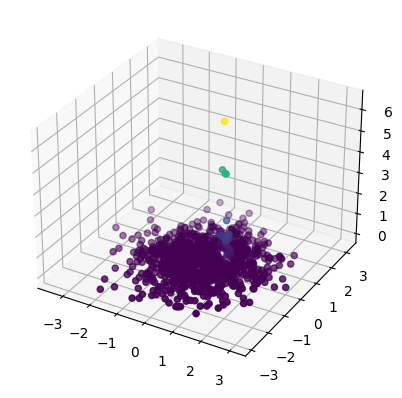

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(res.w0, res.w1, res.likelihood, c=res.likelihood, cmap='viridis')

In [11]:
res[res.likelihood == max(res.likelihood)]

,w0,w1,likelihood
674,0.482387,0.484023,6.427232e-83
